### Predict Trainee Performance

Your client is a multi-national financial company, which offers multiple products to the consumers. There are multiple channels to offer these products to consumers although major contribution is coming from offline distribution channel. Offline channel sells Financial products to consumers via their agent network and as per government regulation these agents must be certified to sell financial products. There are multiple certification programs against different categories of financial products. 
As this offline channel shares major contribution to total company sales, company focuses on recruitment and certify them to build large agent network. Here, major challenge is training them to get the certifications to sell various type of products. 
You are given a dataset of trainee performance for the training curriculum test wise within multiple programs. Your task is to predict the performance on such tests given the demographic information and training program/test details. This will enable your client to strengthen its training problem by figuring out the most important factors that lead to a better engagement and performance for a trainee.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:

def plot_num_of_record(kwargs):
    n_rows_data = []
    n_cols_data = []
    names = []
    n_rows_data_norm = []
    
    for name, df in kwargs.items():
        n_rows_data.append(df.shape[0])
        n_cols_data.append(df.shape[1])
        names.append(name)
    
    if len(names)!=0:
        for i in n_rows_data:
            n_rows_data_norm.append(round((i/sum(n_rows_data))*100, 2))
        
        fig, axs = plt.subplots(ncols=2, figsize=(8,6))
        fig.suptitle("Number of records In files")
        ax_rows = sns.barplot(names, n_rows_data, ax=axs[0])
        ax_rows.set(xlabel='Files', ylabel='Number of Rows')
        for n, da in enumerate(zip(names, n_rows_data)):
            if da[1]!=0:
                ax_rows.text(n, da[1], str(da[1]) + ",  " + str(n_rows_data_norm[n]) + " %", ha='center')
                
        ax_cols = sns.barplot(names, n_cols_data, ax=axs[1])
        ax_cols.set(xlabel='Files', ylabel='Number of Columns')
        for n, da in enumerate(zip(names, n_cols_data)):
            if da[1]!=0:
                ax_cols.text(n, da[1], da[1], va='center')
    else:
        print("no files are passed")

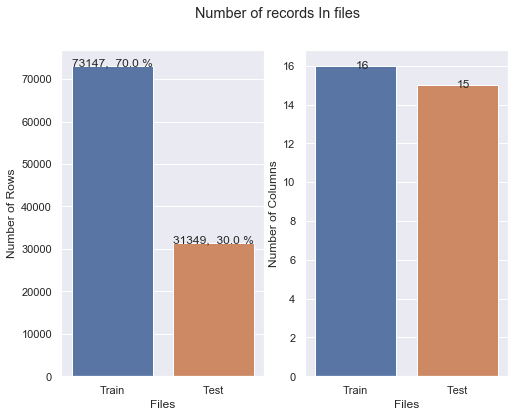

In [4]:
plot_num_of_record({'Train': train_df, 'Test': test_df})


In [5]:
train_df.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
1,16523_44,T_1,T,131,44,offline,easy,16523,F,High School Diploma,4,26.0,2,N,3.0,1
2,13987_178,Z_2,Z,120,178,online,easy,13987,M,Matriculation,1,40.0,1,N,2.0,1
3,13158_32,T_2,T,117,32,offline,easy,13158,F,Matriculation,3,NaN,4,N,1.0,1
4,10591_84,V_3,V,131,84,offline,intermediate,10591,F,High School Diploma,1,42.0,2,N,4.0,1


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73147 entries, 0 to 73146
Data columns (total 16 columns):
id                           73147 non-null object
program_id                   73147 non-null object
program_type                 73147 non-null object
program_duration             73147 non-null int64
test_id                      73147 non-null int64
test_type                    73147 non-null object
difficulty_level             73147 non-null object
trainee_id                   73147 non-null int64
gender                       73147 non-null object
education                    73147 non-null object
city_tier                    73147 non-null int64
age                          45418 non-null float64
total_programs_enrolled      73147 non-null int64
is_handicapped               73147 non-null object
trainee_engagement_rating    73070 non-null float64
is_pass                      73147 non-null int64
dtypes: float64(2), int64(6), object(8)
memory usage: 8.9+ MB


In [7]:
train_df.shape

(73147, 16)

In [8]:
train_df.describe()

,program_duration,test_id,trainee_id,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass
count,73147.000000,73147.000000,73147.000000,73147.000000,45418.000000,73147.000000,73070.000000,73147.000000
mean,128.208676,91.079306,9843.079620,2.246845,36.494033,2.583934,2.395634,0.695408
std,6.889679,51.239048,5703.556093,1.011587,9.041119,1.240816,1.325288,0.460238
min,117.000000,0.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000
25%,121.000000,45.000000,5040.000000,1.000000,28.000000,2.000000,1.000000,0.000000
50%,131.000000,90.000000,9641.000000,2.000000,39.000000,2.000000,2.000000,1.000000
75%,134.000000,135.000000,14552.000000,3.000000,45.000000,3.000000,4.000000,1.000000
max,136.000000,187.000000,20098.000000,4.000000,63.000000,14.000000,5.000000,1.000000


In [9]:
#check for duplicate values
print(f'total duplicate rows: {train_df.duplicated().sum()}')


total duplicate rows: 0


In [10]:
#Check for missing values
train_df.isna().sum()/train_df.shape[0] * 100

id                            0.000000
program_id                    0.000000
program_type                  0.000000
program_duration              0.000000
test_id                       0.000000
test_type                     0.000000
difficulty_level              0.000000
trainee_id                    0.000000
gender                        0.000000
education                     0.000000
city_tier                     0.000000
age                          37.908595
total_programs_enrolled       0.000000
is_handicapped                0.000000
trainee_engagement_rating     0.105267
is_pass                       0.000000
dtype: float64

In [11]:
def plot_nan(data, title, figsize):
    num_records = data.shape[0]
    cols = data.isnull().sum().index.values
    nans = data.isnull().sum().values.astype('int')
    
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.barplot(nans, cols, ax=ax)
    ax.set(xlabel='Number of NaNs', ylabel='Columns')
    ax.set_title(title)
    for n, da in enumerate(zip(cols, nans)):
        if da[1]!=0:
            ax.text(da[1], n, str(da[1]) + ", " + str(round(100*(da[1]/num_records), 2)) + " %", va='center', fontsize=10)

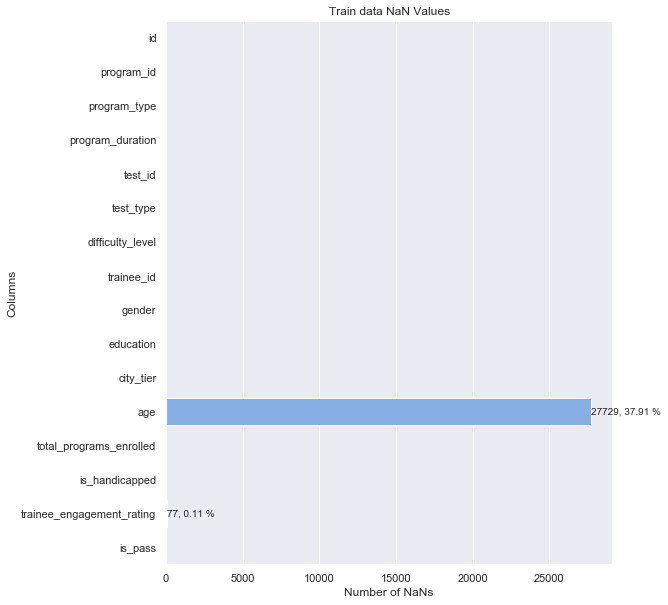

In [12]:
plot_nan(train_df, 'Train data NaN Values', (8,10))

There are missing values in age and trainee_engagement_rating, 37% of value are missing from age and 0.1% in trainee_engagement_rating

#### MIssing values in Test data

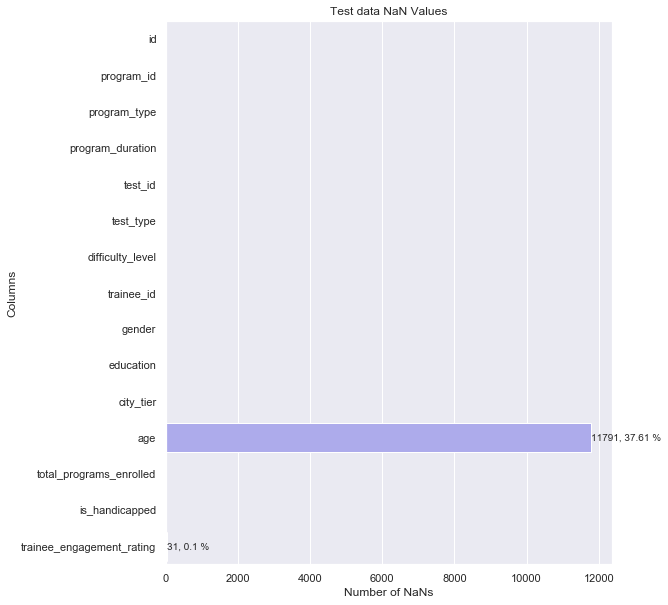

In [13]:
plot_nan(test_df, 'Test data NaN Values', (8,10))

#### Target Column

In [14]:
def plot_bar_counts_categorical(data_se, title, figsize, sort_by_counts=False):
    info = data_se.value_counts()
    info_norm = data_se.value_counts(normalize=True)
    categories = info.index.values
    counts = info.values
    counts_norm = info_norm.values
    fig, ax = plt.subplots(figsize=figsize)
    if data_se.dtype in ['object']:
        if sort_by_counts == False:
            inds = categories.argsort()
            counts = counts[inds]
            counts_norm = counts_norm[inds]
            categories = categories[inds]
        ax = sns.barplot(counts, categories, orient = "h", ax=ax)
        ax.set(xlabel="count", ylabel=data_se.name)
        ax.set_title("Distribution of " + title)
        for n, da in enumerate(counts):
            ax.text(da, n, str(da)+ ",  " + str(round(counts_norm[n]*100,2)) + " %", fontsize=10, va='center')
    else:
        inds = categories.argsort()
        counts_sorted = counts[inds]
        counts_norm_sorted = counts_norm[inds]
        ax = sns.barplot(categories, counts, orient = "v", ax=ax)
        ax.set(xlabel=data_se.name, ylabel='count')
        ax.set_title("Distribution of " + title)
        for n, da in enumerate(counts_sorted):
            ax.text(n, da, str(da)+ ",  " + str(round(counts_norm_sorted[n]*100,2)) + " %", fontsize=10, ha='center')

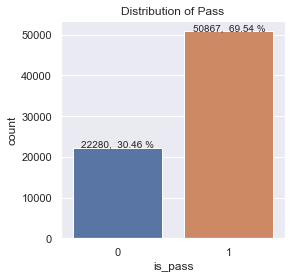

In [15]:
plot_bar_counts_categorical(train_df['is_pass'], 'Pass', (4,4))

In [16]:
train_df.is_pass.value_counts()/train_df.shape[0]*100

1    69.540788
0    30.459212
Name: is_pass, dtype: float64

In [17]:
train_df.is_pass.value_counts(normalize=True)

1    0.695408
0    0.304592
Name: is_pass, dtype: float64

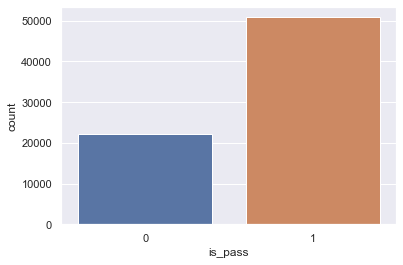

In [18]:
sns.countplot('is_pass',data=train_df)

There is imbalance in the data, 69% belong to positive class and 30% to negative class

### Unique value counts in columns

In [19]:
train_df.nunique()

id                           73147
program_id                      22
program_type                     7
program_duration                10
test_id                        188
test_type                        2
difficulty_level                 4
trainee_id                   18500
gender                           2
education                        5
city_tier                        4
age                             45
total_programs_enrolled         13
is_handicapped                   2
trainee_engagement_rating        5
is_pass                          2
dtype: int64

#### Analysis on Categorical Attributes

In [20]:
#drop id column
train_df = train_df.drop(['id'],axis=1)
train_df.columns

Index(['program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [21]:
#numerical columns
train_df.select_dtypes(include='number').columns

Index(['program_duration', 'test_id', 'trainee_id', 'city_tier', 'age',
       'total_programs_enrolled', 'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [22]:
#categorical columns
train_df.select_dtypes(exclude='number').columns

Index(['program_id', 'program_type', 'test_type', 'difficulty_level', 'gender',
       'education', 'is_handicapped'],
      dtype='object')

In [23]:
categorical_columns = ['program_id', 'program_type', 'test_type', 'difficulty_level',
       'gender', 'education', 'is_handicapped','city_tier']
df_cat = train_df[categorical_columns].copy()

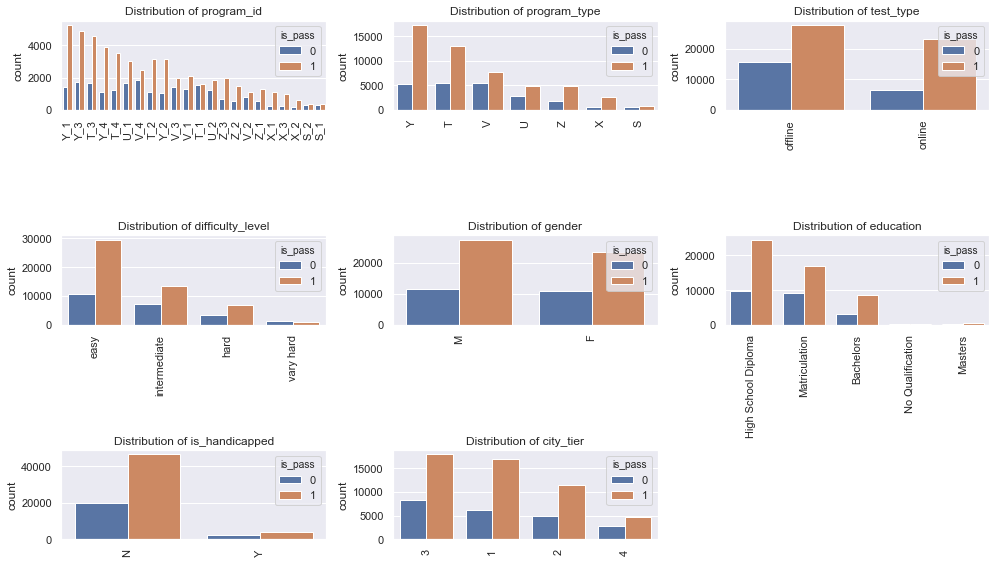

In [24]:

fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cat.columns):
    ax = plt.subplot(3,3,i+1)
    sns.countplot(df_cat[cat], order=df_cat[cat].value_counts().index,hue=train_df['is_pass'])
    ax.set_xlabel(None)
    plt.xticks(rotation=90)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

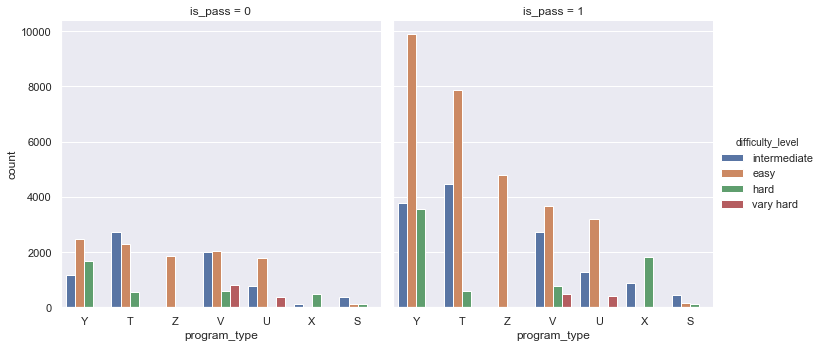

In [25]:
sns.catplot(x='program_type', hue='difficulty_level', col='is_pass', data=train_df, kind='count')
plt.show()

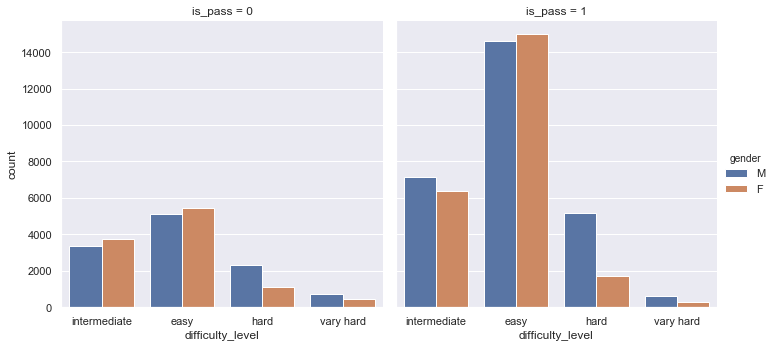

In [26]:
sns.catplot(x='difficulty_level', hue='gender', col='is_pass', data=train_df, kind='count')
plt.show()

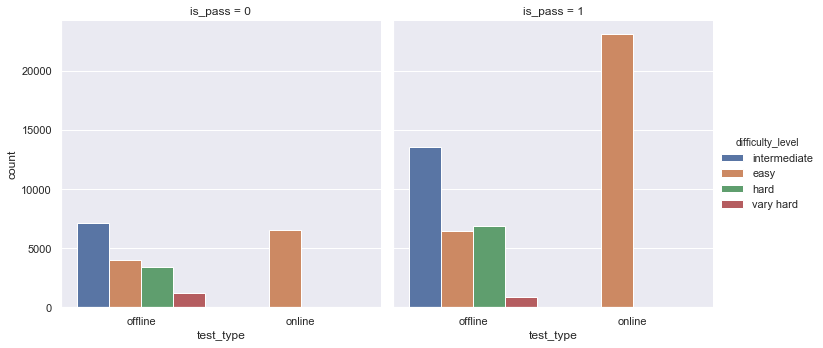

In [27]:
sns.catplot(x='test_type', hue='difficulty_level', col='is_pass', data=train_df, kind='count')
plt.show()

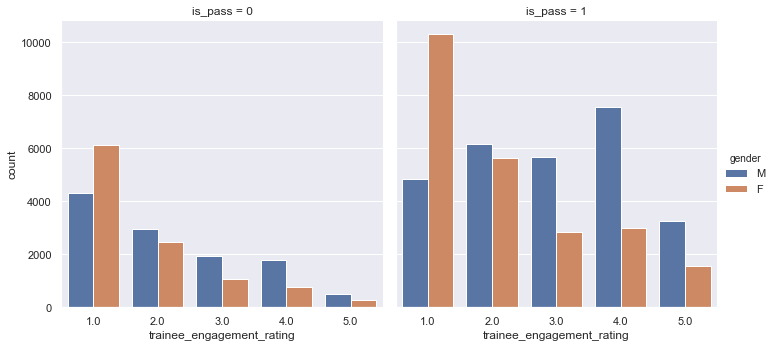

In [28]:
sns.catplot(x='trainee_engagement_rating', hue='gender', col='is_pass', data=train_df, kind='count')
plt.show()

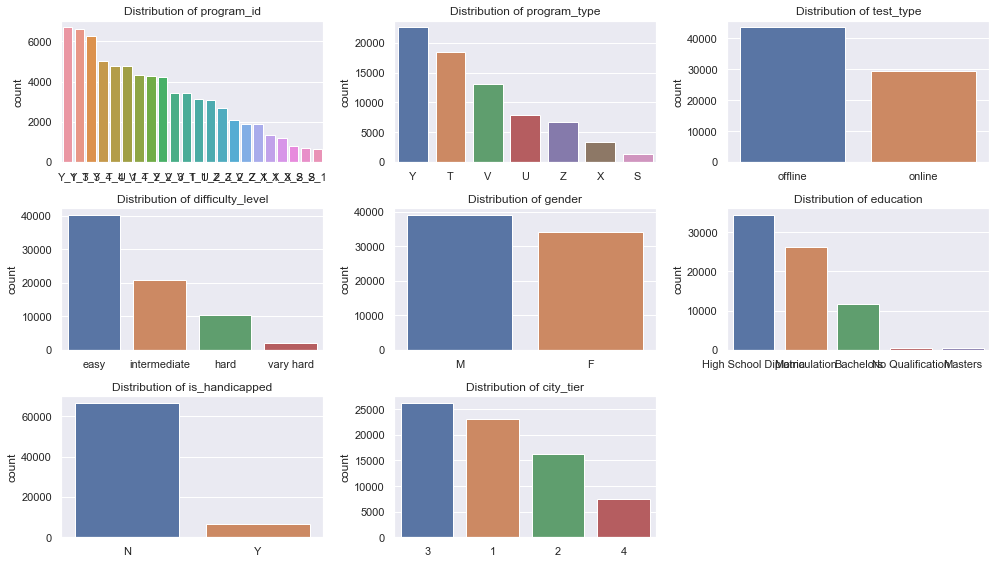

In [29]:
fig = plt.figure(1, (14, 8))

for i,cat in enumerate(df_cat.columns):
    ax = plt.subplot(3,3,i+1)
    sns.countplot(df_cat[cat], order=df_cat[cat].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {cat}')
    plt.tight_layout()

plt.show()

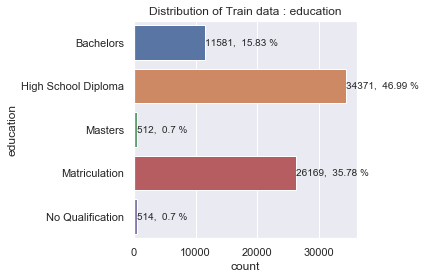

In [30]:
plot_bar_counts_categorical(train_df['education'], 'Train data : education', (4,4))

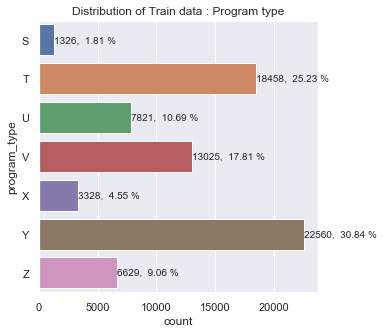

In [31]:
plot_bar_counts_categorical(train_df['program_type'], 'Train data : Program type', (5,5))

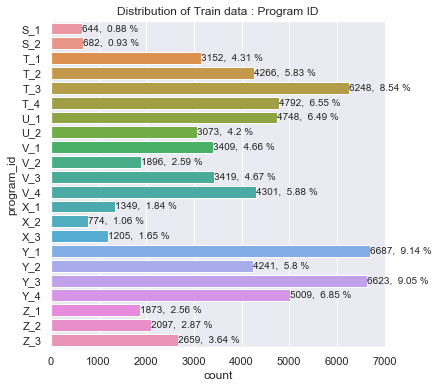

In [32]:
plot_bar_counts_categorical(train_df['program_id'], 'Train data : Program ID', (6,6))

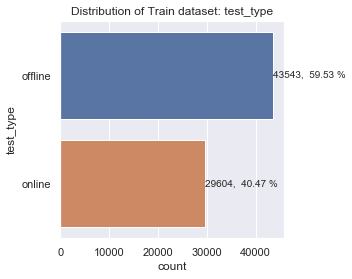

In [33]:
plot_bar_counts_categorical(train_df['test_type'], 'Train dataset: test_type', (4,4))

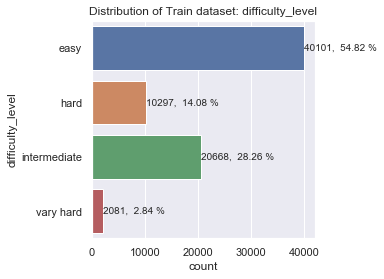

In [34]:
plot_bar_counts_categorical(train_df['difficulty_level'], 'Train dataset: difficulty_level', (4,4))

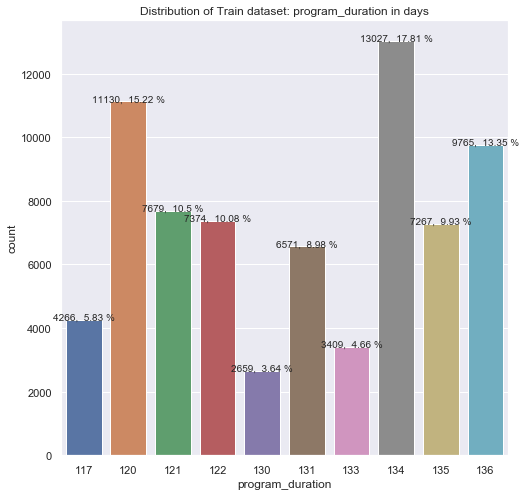

In [35]:
plot_bar_counts_categorical(train_df['program_duration'], 'Train dataset: program_duration in days', (8, 8))

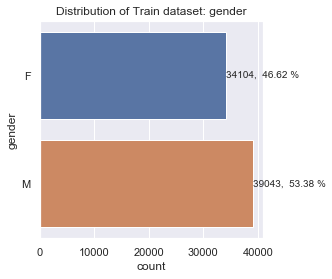

In [36]:
plot_bar_counts_categorical(train_df['gender'], 'Train dataset: gender', (4,4))

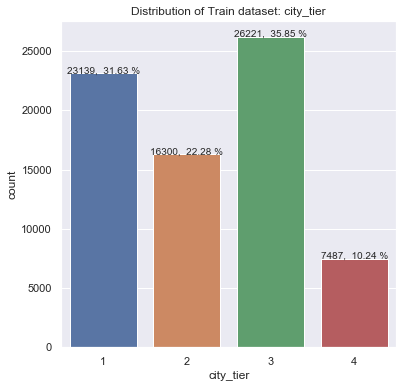

In [37]:
plot_bar_counts_categorical(train_df['city_tier'], 'Train dataset: city_tier', (6, 6))

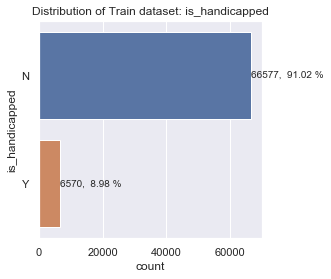

In [38]:
plot_bar_counts_categorical(train_df['is_handicapped'], 'Train dataset: is_handicapped', (4,4))

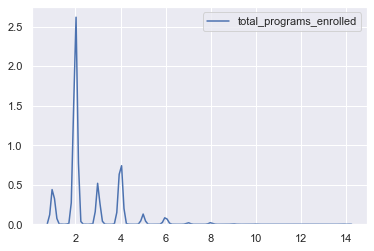

In [39]:
sns.kdeplot(train_df['total_programs_enrolled'])

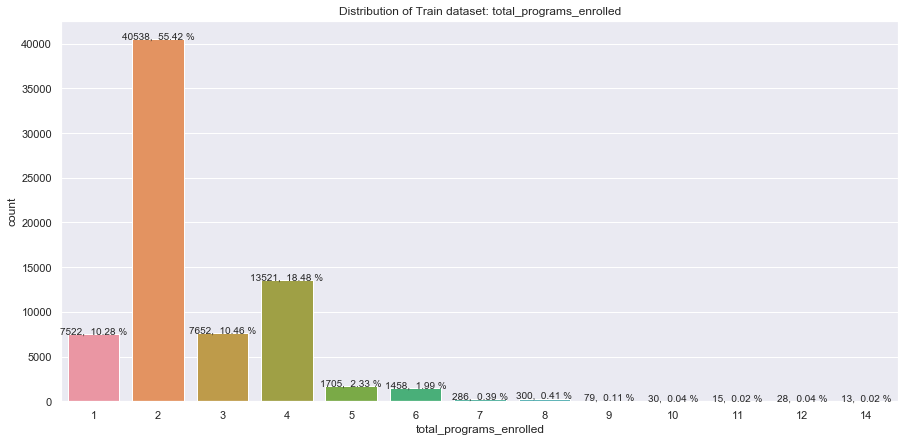

In [40]:
plot_bar_counts_categorical(train_df['total_programs_enrolled'], 'Train dataset: total_programs_enrolled', (15,7))

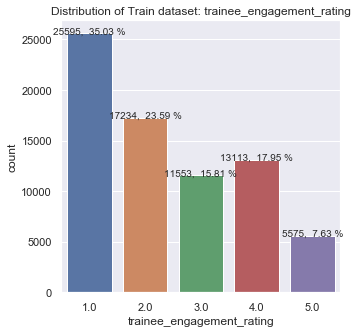

In [41]:
plot_bar_counts_categorical(train_df['trainee_engagement_rating'], 'Train dataset: trainee_engagement_rating', (5,5))

In [42]:
train_df.groupby(['program_type','program_id'])['program_type'].size()

program_type  program_id
S             S_1            644
              S_2            682
T             T_1           3152
              T_2           4266
              T_3           6248
              T_4           4792
U             U_1           4748
              U_2           3073
V             V_1           3409
              V_2           1896
              V_3           3419
              V_4           4301
X             X_1           1349
              X_2            774
              X_3           1205
Y             Y_1           6687
              Y_2           4241
              Y_3           6623
              Y_4           5009
Z             Z_1           1873
              Z_2           2097
              Z_3           2659
Name: program_type, dtype: int64

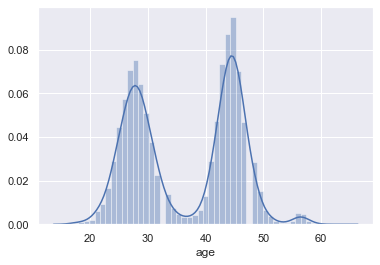

In [43]:
sns.distplot(train_df['age'])

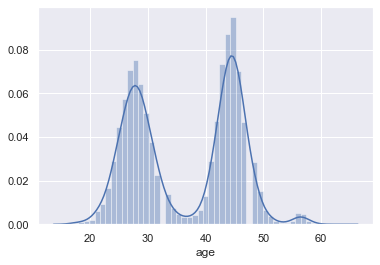

In [44]:
sns.distplot(train_df['age'].dropna())

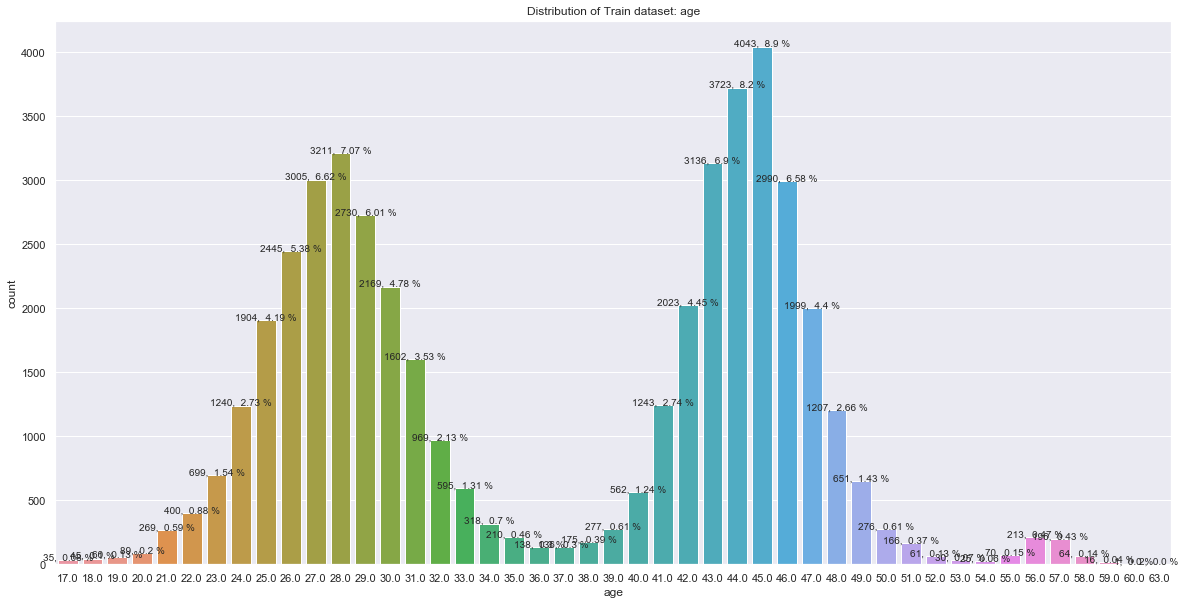

In [45]:
plot_bar_counts_categorical(train_df['age'], 'Train dataset: age', (20,10))

In [46]:
def count_plot_by_hue(data_se, hue_se, title, figsize, sort_by_counts=False):
    if sort_by_counts == False:
        order = data_se.unique()
        order.sort()
    else:
        order = data_se.value_counts().index.values
    off_hue = hue_se.nunique()
    off = len(order)
    fig, ax = plt.subplots(figsize=figsize)
    ax = sns.countplot(y=data_se, hue=hue_se, order=order, ax=ax)
    ax.set_title(title)
    patches = ax.patches
    for i, p in enumerate(ax.patches):
        x=p.get_bbox().get_points()[1,0]
        y=p.get_bbox().get_points()[:,1]
        total = x
        p = i
        q = i
        while(q < (off_hue*off)):
            p = p - off
            if p >= 0:
                total = total + (patches[p].get_bbox().get_points()[1,0] if not np.isnan(patches[p].get_bbox().get_points()[1,0]) else 0)
            else:
                q = q + off
                if q < (off*off_hue):
                    total = total + (patches[q].get_bbox().get_points()[1,0] if not np.isnan(patches[q].get_bbox().get_points()[1,0]) else 0)
       
        perc = str(round(100*(x/total), 2)) + " %"
        
        if not np.isnan(x):
            ax.text(x, y.mean(), str(int(x)) + ",  " + perc, va='center')
    plt.show()

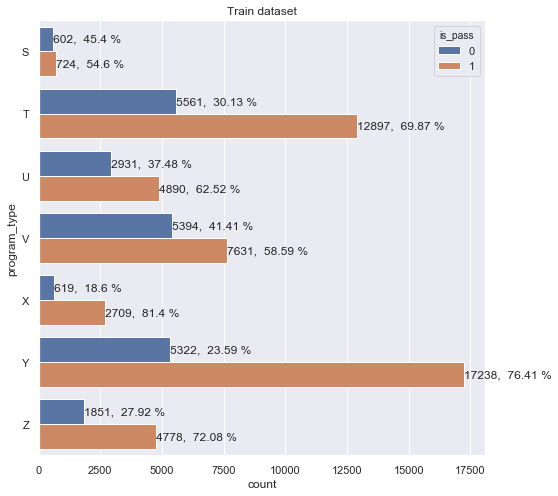

In [47]:
count_plot_by_hue(train_df['program_type'], train_df['is_pass'], 'Train dataset', (8,8))

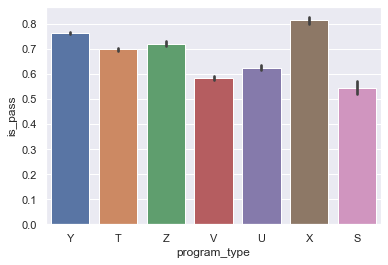

In [48]:
sns.barplot(train_df['program_type'], train_df['is_pass'])

Trainee in X and Y program type have higher chances to pass the test (look at the pass percentage)

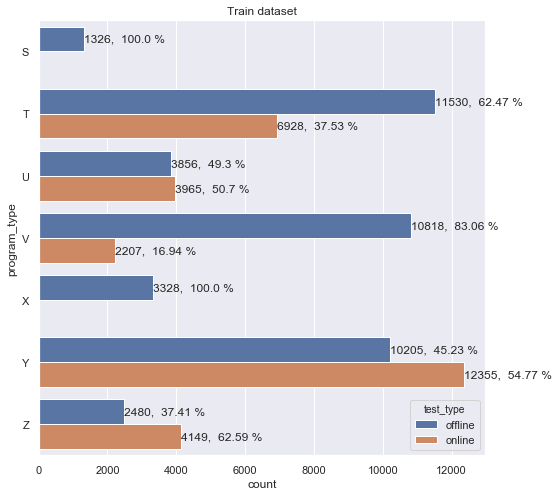

In [49]:
count_plot_by_hue(train_df['program_type'], train_df['test_type'], 'Train dataset', (8,8))

#### test_type vs is_pass


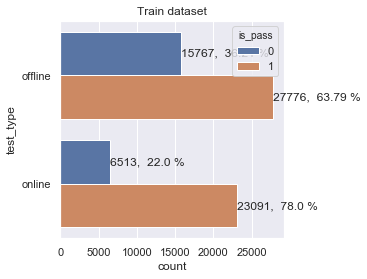

In [50]:
count_plot_by_hue(train_df['test_type'], train_df['is_pass'], 'Train dataset', (4,4))

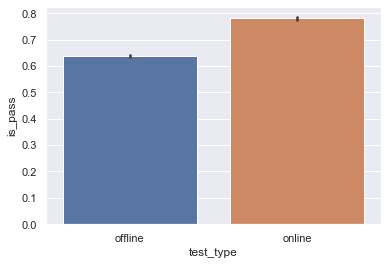

In [51]:
sns.barplot(train_df['test_type'], train_df['is_pass'])

Trainee attending online mode of test have higher chances to pass the test

In [52]:
# difficulty_level vs program_type

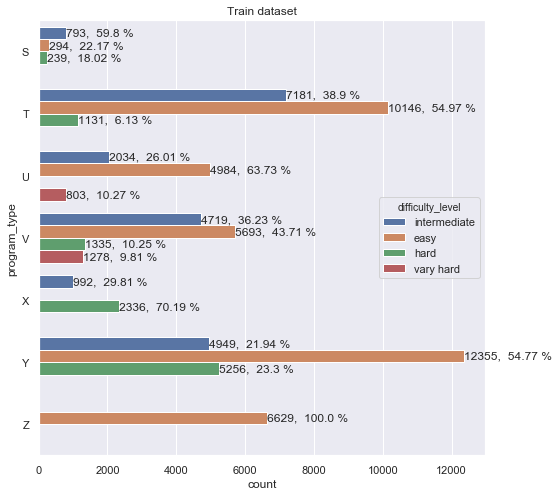

In [53]:
count_plot_by_hue(train_df['program_type'], train_df['difficulty_level'], 'Train dataset', (8,8))

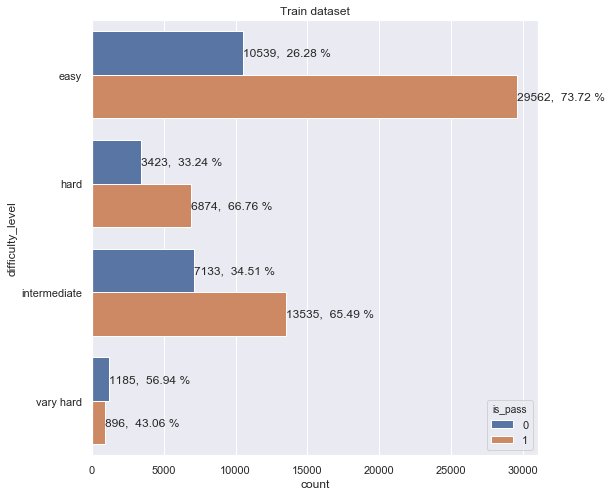

In [54]:
# difficulty_level vs is_pass
count_plot_by_hue( train_df['difficulty_level'], train_df['is_pass'],'Train dataset', (8,8))

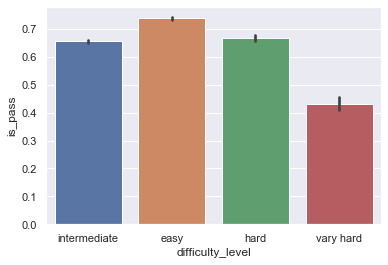

In [55]:
sns.barplot(train_df['difficulty_level'], train_df['is_pass'])


If the difficulty level of the test is easy, chances to pass the test are higher

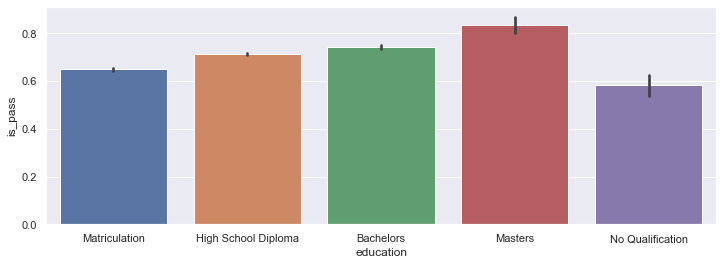

In [56]:
# education vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train_df['education'], train_df['is_pass'])

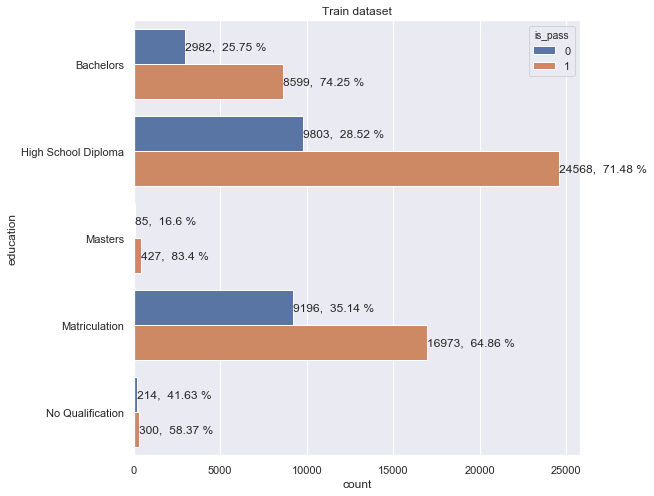

In [57]:
count_plot_by_hue( train_df['education'], train_df['is_pass'],'Train dataset', (8,8))

Although there are many trinees with highschool diploma attending the training, Trainee with Masters education level have more chances to pass the test (look at the percentage)


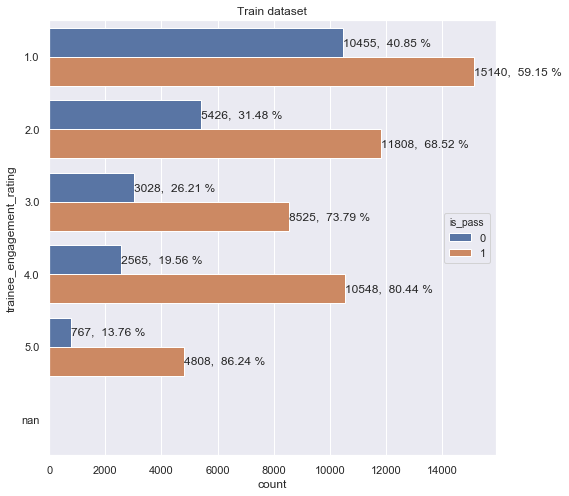

In [58]:
# trainee_engagement_rating vs is_pass
count_plot_by_hue( train_df['trainee_engagement_rating'], train_df['is_pass'],'Train dataset', (8,8))

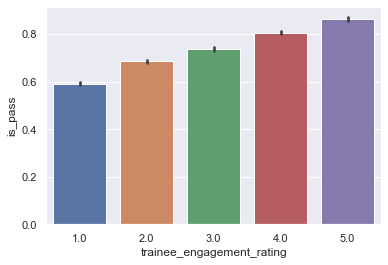

In [59]:
sns.barplot(train_df['trainee_engagement_rating'], train_df['is_pass'])


As the trainee engagement rating increases, chances to pass the test also increases

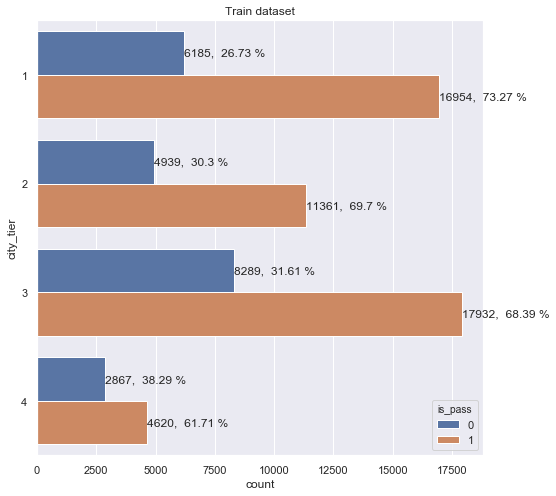

In [60]:
# city_tier vs is_pass
count_plot_by_hue( train_df['city_tier'], train_df['is_pass'],'Train dataset', (8,8))

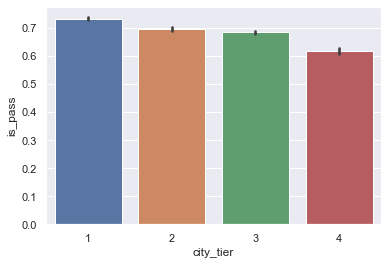

In [61]:
sns.barplot(train_df['city_tier'], train_df['is_pass'])


Trainee from city tier 1 have higher chances to pass the test

In [62]:
train_df.columns

Index(['program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [63]:
num_columns = train_df.select_dtypes(include='number').columns
num_columns= ['program_duration', 'test_id', 'trainee_id','total_programs_enrolled','age']

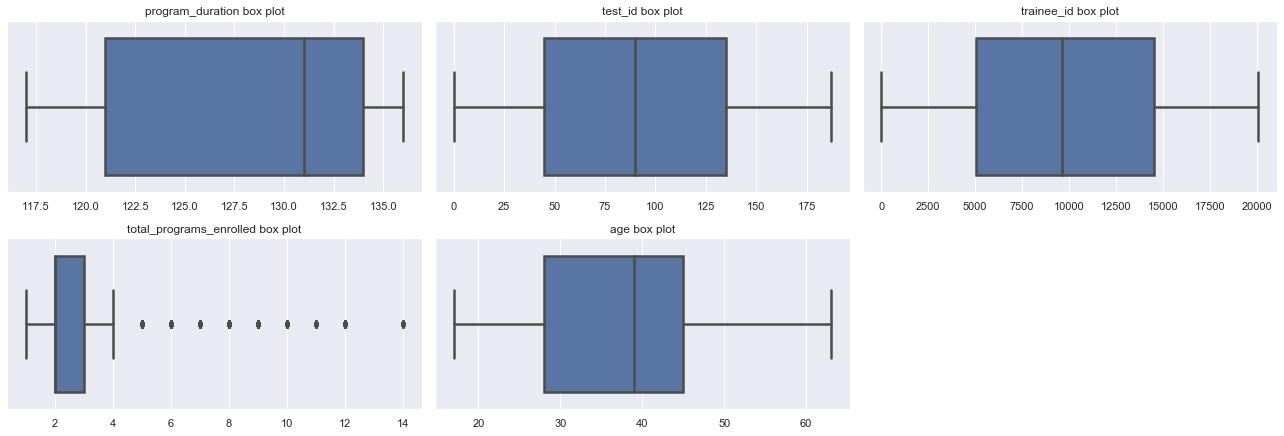

In [64]:
rows = len(num_columns)
cols = 3

fig = plt.figure(1, (18, rows*3))

i = 0
for col in num_columns:

    i += 1
    ax3 = plt.subplot(rows, cols,i)
    sns.boxplot(train_df[col], orient='h', linewidth=2.5)
    ax3.set_xlabel(None)
    ax3.set_title(f'{col} box plot')
    plt.tight_layout()

In [65]:
##Let's analyse the outliers using tukey formula.

def tukey_outliers(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    
    iqr = q3-q1
    
    min_range = q1 - iqr*1.5
    max_range = q3 + iqr*1.5
    
    outliers = x[(x<min_range) | (x>max_range)]
    return outliers

In [66]:
for col in num_columns:
    outliers = tukey_outliers(train_df[col])
    if len(outliers):
        print(f"* {col} has these tukey outliers,\n{outliers}\n")
    else:
        print(f"* {col} doesn't have any tukey outliers.\n")

* program_duration doesn't have any tukey outliers.

* test_id doesn't have any tukey outliers.

* trainee_id doesn't have any tukey outliers.

* total_programs_enrolled has these tukey outliers,
0         5
22        6
39        5
65        7
74        6
         ..
73056     7
73113     6
73118     6
73123    10
73124     5
Name: total_programs_enrolled, Length: 3914, dtype: int64

* age doesn't have any tukey outliers.



In [67]:
train_df.iloc[list(tukey_outliers(train_df.total_programs_enrolled).index)]

,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,Y_1,Y,136,150,offline,intermediate,9389,M,Matriculation,3,24.0,5,N,1.0,0
22,Y_4,Y,121,115,offline,hard,2352,M,High School Diploma,3,NaN,6,Y,3.0,1
39,U_1,U,134,61,online,easy,17979,M,High School Diploma,2,48.0,5,N,2.0,1
65,T_2,T,117,41,online,easy,4500,F,Matriculation,3,29.0,7,N,1.0,1
74,T_3,T,134,28,online,easy,2624,F,High School Diploma,1,NaN,6,N,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73056,Y_3,Y,135,133,online,easy,455,M,Bachelors,4,46.0,7,N,2.0,0
73113,Y_1,Y,136,158,online,easy,8865,M,Matriculation,2,NaN,6,N,4.0,0
73118,S_1,S,135,7,offline,intermediate,3094,F,Matriculation,3,NaN,6,Y,1.0,0
73123,Y_1,Y,136,156,online,easy,13489,F,High School Diploma,3,NaN,10,N,3.0,1


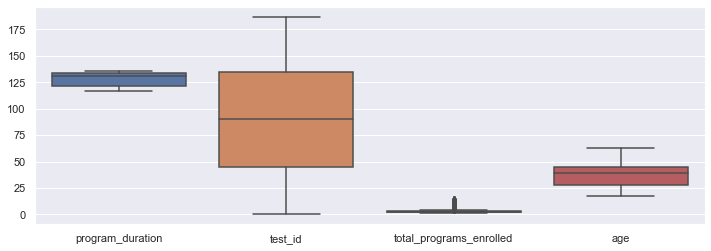

In [68]:
# see data is not scaled properly, we need to scale it for modelling but works fine for analysis.
fig = plt.figure(1, (12, 4))
ax = plt.subplot(1,1,1)
sns.boxplot(x="variable", y="value", data=pd.melt(train_df[num_columns].drop(['trainee_id'],axis=1)))
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [69]:
train_df.columns

Index(['program_id', 'program_type', 'program_duration', 'test_id',
       'test_type', 'difficulty_level', 'trainee_id', 'gender', 'education',
       'city_tier', 'age', 'total_programs_enrolled', 'is_handicapped',
       'trainee_engagement_rating', 'is_pass'],
      dtype='object')

In [70]:
## label encoding

feat = ['test_type', 'gender', 'is_handicapped','program_id','program_type']
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

for i in feat:

    train_df[i] = lb.fit_transform(train_df[i].astype('str'))     
    train_df[i] = train_df[i].astype('int')

In [71]:
edu_dic = {'No Qualification':1,'High School Diploma':2,'Matriculation':3,'Bachelors':4,'Masters':5}
train_df['education'] = train_df['education'].map(edu_dic)

In [72]:
## for difficulty level
dic = {'easy':1, 'intermediate':2, 'hard':3, 'vary hard': 4}

train_df['difficulty_level'] = train_df['difficulty_level'].map(dic)

In [73]:
# Imputing missing value in age variable with median and in trainee_engagement_rating variable with mode of that variable.

In [74]:
train_df['age']=train_df['age'].fillna(train_df['age'].median())
train_df['trainee_engagement_rating']=train_df['trainee_engagement_rating'].fillna(train_df['trainee_engagement_rating'].mode()[0])

#### Feature Importance

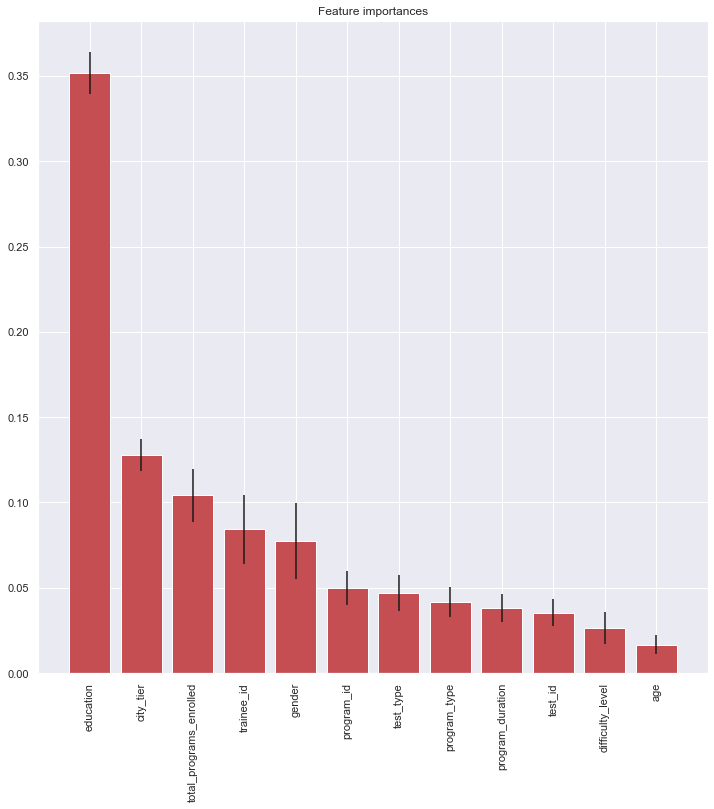

In [75]:
train_y = train_df['is_pass'].values
id_col = ['trainee_id','test_id']
train_df_new = train_df.drop(['is_pass']+id_col, axis=1)
feat_names = train_df.columns.values

from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_df_new, train_y)

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

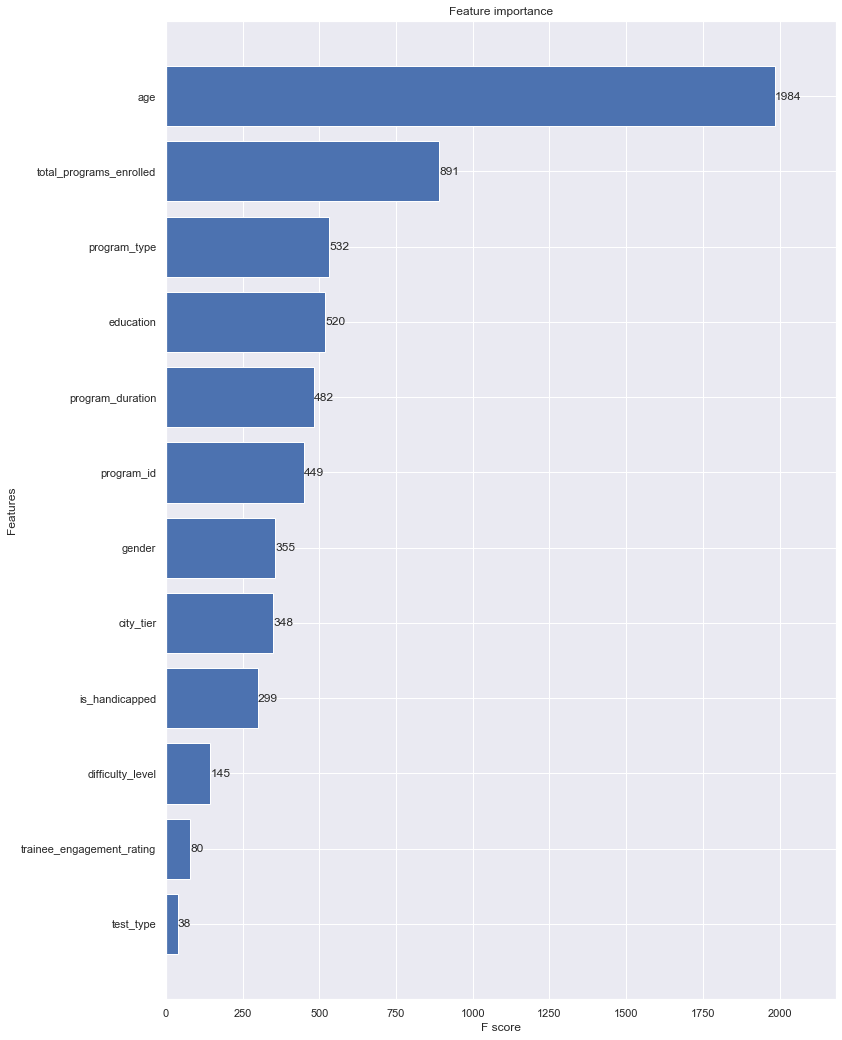

In [94]:
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.4,
    'objective': "binary:logistic",
    'seed' : 0
}
dtrain = xgb.DMatrix(train_df_new, train_y, feature_names=train_df_new.columns.values)
model = xgb.train(dict(xgb_params), dtrain, num_boost_round=50)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()


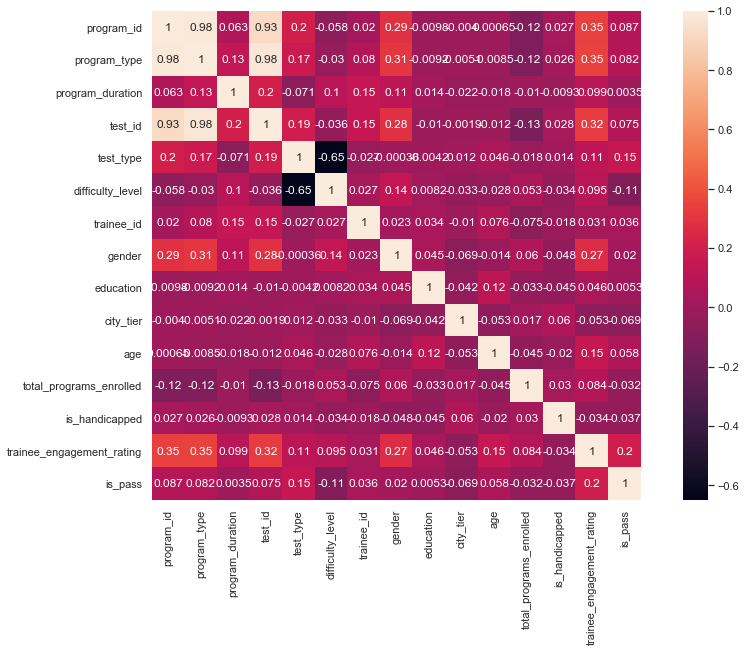

In [77]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(15,9))
sns.heatmap(corrmat, square=True, annot=True)
ax.set_ylim(sorted(ax.get_xlim(), reverse=True));


#### Test data Preprocessing 

In [78]:
test_df['age']=test_df['age'].fillna(test_df['age'].median())
test_df['trainee_engagement_rating']=test_df['trainee_engagement_rating'].fillna(test_df['trainee_engagement_rating'].mode()[0])

In [79]:
for i in feat:

    test_df[i] = lb.fit_transform(test_df[i].astype('str'))     
    test_df[i] = test_df[i].astype('int')

In [80]:
test_df['education'] = test_df['education'].map(edu_dic)

In [81]:
## for difficulty level
test_df['difficulty_level'] = test_df['difficulty_level'].map(dic)

In [82]:
test_df = test_df.drop(['id','trainee_id','test_id'], axis=1)

### Modeling

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [90]:
X=train_df_new.copy()
y= train_y
# Logistic regression using 5 fold stratified cross validation
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1,max_iter=500)
     model.fit(xtr, ytr)
     pred=model.predict_proba(xvl)[:,1]
     score = roc_auc_score(yvl,pred)
     print('roc_auc_score',score)
     i+=1
# Making predictions for the test data


1 of kfold 5
roc_auc_score 0.6600607574522872

2 of kfold 5
roc_auc_score 0.6679608739706485

3 of kfold 5
roc_auc_score 0.6611608954141821

4 of kfold 5
roc_auc_score 0.662223063002869

5 of kfold 5
roc_auc_score 0.6687751076043338


In [91]:
pred=model.predict_proba(test_df)[:,1]

In [92]:
pred

array([0.78338437, 0.83736262, 0.79237391, ..., 0.85635136, 0.61262643,
       0.65251488])